Week 02 Day 03: Data formatting, SQL and more text processing
=================

Today we will be looking at some further data formatting. We will also be introducing SQL or Structured Query Language. 

Learning goals: 
- Understand the use of sql through sqlite. 
- Parsing Dates 
- Making use of Map / Apply / Lambda. 

We will be using some old data related to the 2016 UK election, but it's useful data. 

In [126]:
from IPython.display import display
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


C:\Users\bernie\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Section 1. Using sql databases

SQL stands for Structured Query Language. It is a way to store data in relational tables. This is to say tables that follow the row / column format. Each 'database' can store multiple tables. 

There has been a movement in recent years away from relational databases towards newer forms of data stores, such as GraphDB and MongoDB, as part of the 'noSQL' paradigm. First, that's silly. Seccond, it's a little presumptuous to assume that other data stores can do the trick better. 
- MongoDB is a store for json-like objects. It's fast, simple and not so powerful except for queuing systems. 
- Neo4j is a 'graphdb' that stores entries as nodes and edges. It's hard to wrap your head around, but it does make some form of querying relatively straightforward that would otherwise not be the case. 

Having worked with Mongo, Neo4j and SQL, I can confidently say that SQL has a very prominent place in data stores. Lately, a number of domains have started to return to SQL databases. This is because while the data can be stored in other more flexible formats, ofte formats that mimic the data in other contexts, they are not so amenable to post-processing. 

Tables in SQL can be **indexed** or not. When they are indexed, using a 'key' it is easier to query and search for data. Keys keep tables organized but are not necessary. A 'primary key' is an index where each entry is unique.

SQL is structured query language, but not a specific database type. Most SQL is interoperable, but some is specific to the type of database. There are also SQL flavours that are used in APIs but restrict certain kinds of queries. For a while Facebook had FQL which allowed developers to query for data on select tables. This has been deprecated in favour of a graph database structure. Some example databases are:
- ```Oracle```. The version in use in many industries. 
- ```MySQL```. An open source SQL implementation in use in a lot of server applications. It is the M in a 'LAMP stack', which stands for Linux, Apache, MySQL and PHP, which for many was the building block of dynamic webpages. It is being slowly replaced by NodeJS variants such as React, but is still a common way to build and serve dynamic content. 
- ```PostGRES```. A version that's often used in academia and some other environments. It can be a bit more tricky to set up than MySQL. 
- ```SQLite```. The only one of these flavours that isn't designed to be interacted with via a server. SQLite databases exist all over your computer, particularly on a mac. This is because you can just read and write to a SQLite database as if it were a file. 

We can use SQLite through a number of modules. Two popular ones in python are ```sqlalchemy``` and ```sqlite3```. The former is a little more 'pythonic' in that you can interface with the database through objects and methods. SQLite3 is a little more of a wrapper around direct SQL commands. We will use SQLite3 because it is less abstract as well as allowing you to see SQL commands directly. Below we will see how to open and view details about a database. 



In [129]:
import sqlite3 as lite
con = lite.connect('example.db')

cursor = con.cursor()
cursor.execute('''
    CREATE TABLE if not exists users(id INTEGER PRIMARY KEY, name TEXT,
                       title TEXT, email TEXT unique)
''')
con.commit()

Notice in the above a couple of important notes. 
- We use id as an integer primary key. This is automatically generated. 
- email is supposed to be unique, if you try to write two users with the same email it will raise an OperationalError. 
- We 'commit' changes to the database. Databases have connections and cursors. Cursors get things ready, but we actually operate on the database. So notice that it is ```cursor.execute()``` but ```con.commit()```. 

In [130]:
cursor = con.cursor()

name1 = 'Joss Wright'
title1 = 'Senior Research Fellow'
email1 = 'joss.wright@oii.ox.ac.uk'
 
name2 = 'Greg Taylor'
title2 = 'Associate Professor, Senior Research Fellow, Director of Graduate Studies'
email2 = 'greg.taylor@oii.ox.ac.uk'

name3 = 'Taha Yasseri'
title3 = 'Senior Research Fellow'
email3 = 'taha.yasseri@oii.ox.ac.uk'

##################################
# Three insert statements in a row
try: 
    # 1. 
    cursor.execute('''INSERT INTO users(name, title, email)
                      VALUES(?,?,?)''', (name1,title1, email1))
    print('First user inserted')

    # 2.
    cursor.execute('''INSERT INTO users(name, title, email)
                      VALUES(?,?,?)''', (name2, title2, email2))
    print('Second user inserted')

    # 3.
    cursor.execute('''INSERT INTO users(name, title, email)
                      VALUES(?,?,?)''', (name3, title3, email3))
    print('Third user inserted')

    con.commit()
except:
    print("Are you certain the above values are unique?")

con.close()

Are you certain the above values are unique?


Now we can import this database into a DataFrame if we want to perform operations in python rather than SQL. We can do this with the pandas.read_sql() command, which will connect to and execute a query on a database in one line. See below:

In [131]:
import sqlite3
import pandas as pd 

df = pd.read_sql("select * from users",sqlite3.connect("example.db"))
display(df.head())

,id,name,title,email
0,1,Joss Wright,Senior Research Fellow,joss.wright@oii.ox.ac.uk
1,2,Greg,"Associate Professor, Senior Research Fellow, D...",greg.taylor@oii.ox.ac.uk
2,3,Taha Yasseri,Senior Research Fellow,taha.yasseri@oii.ox.ac.uk


The above used ``` 'select * from <table>' ``` to get everything in the table. You can be more specific in SQL in a variety of ways. Some relevant ways: 
- **Where**: This is a clause at the end of the SQL select statement that works as a filter. So you might 
    - ```select * from users where users.name == "Joss Wright"```
- **count(column_name)**: This is an aggregation option to count the instances of rows being selected
    - ```select count(name) from users```
- **Group By**: This is an aggregation option. This is often used to get the data aggregated in subsets. This option with count is similar to value_counts in pandas. 

In [133]:
df = pd.read_sql("select * from users where title == 'Senior Research Fellow'",sqlite3.connect("example.db"))
display(df.head())

,id,name,title,email
0,1,Joss Wright,Senior Research Fellow,joss.wright@oii.ox.ac.uk
1,3,Taha Yasseri,Senior Research Fellow,taha.yasseri@oii.ox.ac.uk


In [118]:
df = pd.read_sql("select count(name) from users",sqlite3.connect("example.db"))
display(df.head())

,count(name)
0,3


In [139]:
df = pd.read_sql("select title as Title, count(title) as Count from users group by title",sqlite3.connect("example.db"))
display(df.head())

,Title,Count
0,"Associate Professor, Senior Research Fellow, D...",1
1,Senior Research Fellow,2


We will not be using SQLite databases that much in the rest of the course (except one small potential module next week), but it is good for you to know them and see them. They will be of considerable use in the later weeks after this course. However, I tend to simply store things in DataFrames, CSVs and pickles these days. The speed difference is unremarkable. 

# Section 2. Dates and the datetime module 

Dates have a variety of representations. We think of time in a cyclical sense of years, weeks and months. These have meaning for humans. Computers tend to manage time in terms of seconds since 'epoch', which is when Unix time started on January 1, 1970.  

Different representations of time can be handled in Python. This week we will be parsing some time data, next week we will use this to plot some times between posting on a website. 

There are two important modules for time in python. The ```time``` module which handles differences in time, and the management of time. If you want your program to 'sleep' you can run: 
~~~ python
time.sleep( <number_of_seconds> )
~~~

There are many useful objects under time, but what we probably want is to take dates and manage them. This is covered under the ```datetime``` module. 

Below we will see how Twitter sends down the datetime in a tweet object. We then have to parse this date if we want to have it in a form that Twitter can understand.

In [121]:
# Taken from https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html

tweet = {
 "created_at":"Thu Apr 06 15:24:15 +0000 2017",
 "id": 850006245121695744,
 "id_str": "850006245121695744",
 "text": "1/ Today we’re sharing our vision for the future of the Twitter API platform!nhttps://t.co/XweGngmxlP",
 "user": {},  
 "entities": {}
}

print(type(tweet['created_at']),tweet['created_at'])

<class 'str'> Thu Apr 06 15:24:15 +0000 2017


So we can see that it is a string, when we really want a date. We can see that the date in this tweet object is represented as: 
~~~json
"created_at":"Thu Apr 06 15:24:15 +0000 2017",
~~~
which means:
~~~
Weekday Month Date 24hour:minute:seconds +timezonehours year
~~~

To parse this as a datetime object we can use datetime.strptime(). This handy module works similar to a regular expression. You enter in various details about the date in a regular format and it parses these and creates a datetime object. 

Below first is an example. The escape codes to use can be found in the help file (partially), and more extensively at http://strftime.org/ 

One thing to note is that by default, it assumes english names for dates. You can set a locale flag for other languages. 

In [142]:
from datetime import datetime

tweetdate = "time is Thu Apr 06 15:24:15 +0000 2017"

tweetdateobject = datetime.strptime(tweetdate, 'time is %a %b %d %H:%M:%S %z %Y')
print(datetime.strftime(tweetdateobject, 'time is %H %H %a %b %d %H:%M:%S %z %Y'))
print(type(tweetdateobject),tweetdateobject)

time is 15 15 Thu Apr 06 15:24:15 +0000 2017
<class 'datetime.datetime'> 2017-04-06 15:24:15+00:00


Once you have date in a datetime object, you can query basic elements about it as well as represent it as a string and do some time calculations on it. For example, we can as for the date, minute, month, etc... we can also represent the date in Unix time, the Bhuddist calendar or shifted by time zone. 

In [146]:
tdo = tweetdateobject
print(tdo.date)
print(tdo.minute)
print(type(tdo.time()))

<built-in method date of datetime.datetime object at 0x0000022E45C71FC0>
24
<class 'datetime.time'>


A common thing to do with date time is to tell the difference between two times. This difference is referred to as a ```timedelta```. 

We can compare the difference between the datetime object we just parsed and another using +/- arithmetic. See the example below. In this example we use 'now', by getting the time of now. 

In [147]:
today = datetime.now()
print(today - tdo)

TypeError: can't subtract offset-naive and offset-aware datetimes

Oh! It seems that unlike the above tweet, 'now' is not timezone aware. We can change this and in doing so make the code run. There are two ways. The first is stripping the timezone off of the tweetdateobject. This is not really ideal. The second is addding the same timezone to now, which is UTC. 

In [148]:
from datetime import timezone 

######################
# The not so good way: 
tdo_zoneless = tdo.replace(tzinfo=None)
now = datetime.now()

print(now - tdo_zoneless)
##########################
# The better way. 
now = datetime.now(timezone.utc)
print(now - tdo)
print(type(now - tdo))

559 days, 20:33:49.647076
559 days, 19:33:49.647076
<class 'datetime.timedelta'>


As we can see we got an off-by-one-hour error here. What is that? It's because this course is happening in the UK, which is not running on UTC at the moment. Instead, it is using British Summer Time. As such, we have got an off by one hour error here as the original tweet was coded in UTC and now() is coded in BST. 

# Section 3. Cleaing up data - exercises in DataFrames

Below we will read in an excel table of data. This is a crowdsourced table of data about political candidates. In it we can see the use of map, but not with lambda, instead we simply map the six different gender terms onto a simplified gender binary*. 

In [150]:
import pandas as pd 

df_pol = pd.read_csv("PySDS_PolCandidates.csv",)
display(df_pol.head(3))
print(df_pol.gender.unique())

,name,id,party,constituency,twitter_username,facebook_page_url,party_ppc_page_url,gender
0,Captain Beany,20,Independent,Aberavon,captainbeany,https://www.facebook.com/VoteCaptainBeany,NaN,male
1,Peter Bush,6754,UK Independence Party (UKIP),Aberavon,NaN,https://www.facebook.com/peterbushukip,NaN,male
2,Helen Ceri Clarke,4561,Liberal Democrats,Aberavon,NaN,NaN,http://www.libdems.org.uk/helen_ceri_clarke,female


['male' 'female' 'Male' 'Female' nan 'Female ' 'Man (sex)']


Hmm...it seems that there's several different ways for gender to have been entered, in addition to the missing data character. To recode gender, we can map values to a new column. Map can either use a function for each cell or a dictionary. The dictionary would take keys as input and the values as output. So if we have six gender categories, those are the input. If we define two output categories ('male' and '
female') then the dictionary would look thus: 

~~~ python 
dict_for_map = { 
    "male":0,
    "Male":0,
    "Man (sex)":0,
    "female":1,
    "Female":1,
    "Female ":1
}
~~~

Then we map this on to the existing series to create a new column with map. See the full implementation below. 

In [151]:
mapper = {
    "male":0,
    "Male":0,
    "Man (sex)":0,
    "female":1,
    "Female":1,
    "Female ":1
}

df_pol["bgender"] = df_pol["gender"].map(mapper)
df_pol["bgender"].value_counts(dropna=False)

 0.0    2932
 1.0    1035
NaN        4
Name: bgender, dtype: int64

We can now see that there are 2932 candidates who we identified as male and 1035 identified as female.

Let's make use of this data frame to ask a few questions and then to look at the grouping functions available. First let's ask how many candidates were fielded per party. Then let's ask how many candidates had a twitter handle per party. 

In [153]:
# Series 1. How many pepople per party. 
partyCount = df_pol["party"].value_counts()
print(partyCount.head(10))
print()

# Series 2. How many people per party have a twitter account
haveTwitter = df_pol["twitter_username"].notnull()
# print(haveTwitter)
partyCountWithTwitter = df_pol[haveTwitter]["party"].value_counts()
# print(partyCountWithTwitter)
print(partyCountWithTwitter.tail(20))


Liberal Democrats                         631
Conservative Party                        631
UK Independence Party (UKIP)              614
Labour Party                              589
Green Party                               542
Independent                               170
Trade Unionist and Socialist Coalition    128
Scottish National Party (SNP)              59
Labour and Co-operative Party              42
Plaid Cymru - The Party of Wales           40
Name: party, dtype: int64

Al-Zebabist Nation of Ooog                      1
The 30-50 Coalition                             1
Alter Change - Politics. Only Different         1
Bournemouth Independent Alliance                1
Justice For Men & Boys                          1
Guildford Greenbelt Group                       1
The Eccentric Party of Great Britain            1
Reduce VAT in Sport                             1
Magna Carta Conservation Party Great Britain    1
Restore the Family For Children's Sake          1
Independents 

If we wanted to create a new DataFrame with these two series' that is certainly possible. But remember: 

~~~ python
pd.DataFrame([[list1],[list2]]) 
~~~

will create a dataframe of two rows as long as those lists, not two columns, and we want two columns. So we have a couple options. One worth showing is ```zip()```. Zipping lists come from the way that a zipper works by interleaving the teeth so the two lists:

~~~
l1 = [1,2,3,4]
l2 = [a,b,c,d]
new_l = zip(l1,l2)
~~~
becomes
~~~
[  [1,a], [2,b], [3,c], [4,d]  ]
~~~
The problem here is that we don't have two lists, we have two series. They might have different lengths and so forth. So we have to create a DataFrame that's the wrong axis and then transpose it. We can do that, just like in numpy arrays. 

In [155]:
df_parties = pd.DataFrame([partyCount,partyCountWithTwitter],index=["Party Count","Have Twitter"])
df_parties = df_parties.T
display(df_parties.tail(15))

,Party Count,Have Twitter
Give Me Back Elmo,1.0,1.0
The Republican Socialist Party,1.0,1.0
The Roman Party. Ave,1.0,NaN
The Pilgrim Party,1.0,1.0
The Birthday Party,1.0,1.0
War Veteran's Pro-Traditional Family Party,1.0,NaN
The Sustainable Population Party,1.0,NaN
The UK Progressive Democracy Party,1.0,NaN
Putting Croydon First!,1.0,NaN
Magna Carta Conservation Party Great Britain,1.0,1.0


What percentage of the party candidates have a twitter account? Now it is simply a matter of divding one by the other. 

In [156]:
df_parties["Percent_tweet"] = \
    df_parties["Have Twitter"] / df_parties["Party Count"]

Populating the interactive namespace from numpy and matplotlib


C:\Users\bernie\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


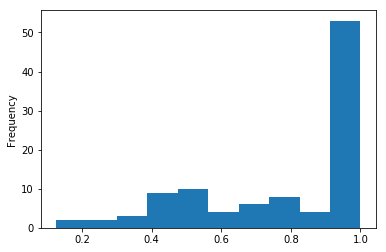

In [157]:
%pylab inline
df_parties["Percent_tweet"].plot(kind="hist")

So what gives with that distribution? It seems pretty skewed to the right. What should we do with that? We can filter the data to get a better look at at.

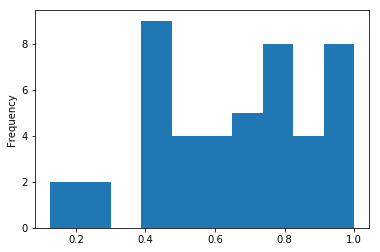

In [161]:
df_parties[df_parties["Party Count"] > 3]["Percent_tweet"].plot(kind="hist")